In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons

# Step 2: Load or generate the planar dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = X.T
y = y.reshape(1, -1).astype(np.float32)  # Cast labels to float32

# Step 3: Define the architecture of the neural network
input_size = 2  # Number of features
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1  # Number of output classes

# Step 4: Implement forward propagation
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = tf.matmul(W1, X) + b1
    A1 = tf.nn.relu(Z1)
    Z2 = tf.matmul(W2, A1) + b2
    A2 = tf.nn.sigmoid(Z2)
    
    return A2

# Step 5: Implement backward propagation
def backward_propagation(X, y, A2, parameters):
    m = X.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1 / m * tf.matmul(dZ2, tf.transpose(X))
    db2 = 1 / m * tf.reduce_sum(dZ2, axis=1, keepdims=True)
    dZ1 = tf.matmul(tf.transpose(parameters['W2']), dZ2) * (1 - tf.square(tf.nn.relu(A2)))
    dW1 = 1 / m * tf.matmul(dZ1, tf.transpose(X))
    db1 = 1 / m * tf.reduce_sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return gradients

# Initialize parameters
def initialize_parameters():
    tf.random.set_seed(42)
    W1 = tf.Variable(tf.random.normal((hidden_size, input_size)), dtype=tf.float32)
    b1 = tf.Variable(tf.zeros((hidden_size, 1)), dtype=tf.float32)
    W2 = tf.Variable(tf.random.normal((output_size, hidden_size)), dtype=tf.float32)
    b2 = tf.Variable(tf.zeros((output_size, 1)), dtype=tf.float32)
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters






In [ ]:
# Step 6: Train the model
def train_model(X_train, y_train, learning_rate, num_epochs):
    parameters = initialize_parameters()
    
    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            A2 = forward_propagation(X_train, parameters)
            loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_train.reshape(-1), logits=tf.squeeze(A2)))  # Reshape labels
            
        gradients = tape.gradient(loss, list(parameters.values()))
        optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
        optimizer.apply_gradients(zip(gradients, list(parameters.values())))
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, loss: {loss.numpy()}")
    
    return parameters

def predict(X, parameters):
    A2 = forward_propagation(X, parameters)
    predictions = tf.round(A2)
    
    return predictions


# Train the model
parameters = train_model(X, y, learning_rate=0.01, num_epochs=1000)

# Make predictions
predictions = predict(X, parameters)




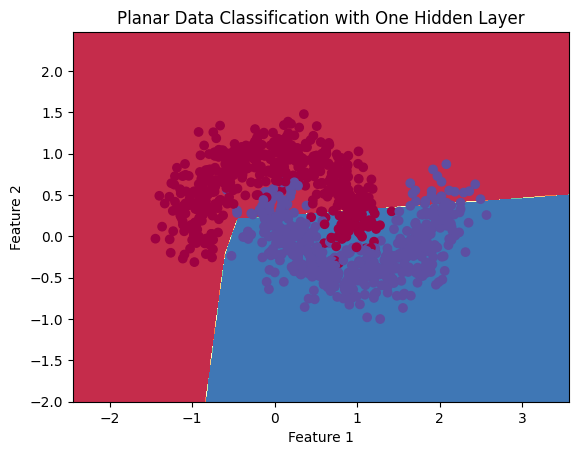

In [6]:
# Plot the decision boundary
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid.T, parameters)
Z = Z.numpy().reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Planar Data Classification with One Hidden Layer')
plt.show()